In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
from multiprocessing import Process
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
INPUT_DIR = "../input/g2net-gravitational-wave-detection"
train_df = pd.read_csv(f"{INPUT_DIR}/training_labels_paths.csv")
test_df = pd.read_csv(f"{INPUT_DIR}/test_paths.csv")
savedir = "../input/whitened-tfrec"

In [27]:
def bandpass(x, lf=20, hf=500, order=8, sr=2048):
    sos = signal.butter(order, [lf,hf], btype="bandpass", output="sos",fs=sr)
    normalization = np.sqrt((hf-lf) / (sr/2))
    if x.ndim == 2:
        for i in range(3):
            x[i] = signal.sosfilt(sos,x[i]) * normalization
    elif x.ndim == 3:
        for i in range(x,shape[0]):
            for j in range(3):
                x[i,j] = signal.sosfilt(sos,x[i,j]) * normalization
    return x

In [28]:
def prepare_wave(wave):
    wave = np.load(train_df.path[0])
    normalized_waves = []
    scaling = np.array([1.5e-20,1.5e-20,0.5e-20], dtype = np.float32)
    for i in range(3):
        normalized_wave = wave[i] / scaling[i]
        normalized_waves.append(normalized_wave)
    wave = np.stack(normalized_waves, axis=0)
    print(wave)
    return wave

In [29]:
def save_files(rg_n, df=train_df):
    all_data_x = np.zeros([len(rg_n),4096,3], dtype=np.float32)
    all_data_y = np.zeros(len(rg_n), dtype=np.uint8)
#     filts=[]
#     for j in range(3):
#         bp = filter_design.bandpass(50,550, 2048)
#         if j == 2:
#             notch_freqs = (50, 100, 150)
#         else:
#             notch_freqs = (60, 120, 180)
#         notches = [filter_design.notch(line, 2048) for line in notch_freqs]
#         zpk = filter_design.concatenate_zpks(bp, *notches)
#         filts.append(zpk)
    print(rg_n)
    slc = df.iloc[rg_n]
    print(slc.head())
    ids = []

    for index in tqdm(range(slc.shape[0])):
        pth, ident, target = slc.iloc[index][["path", "id", "target"]]
        ids.append(ident)
        all_data_y[index] = target
        ts_data = np.load(pth)

#         ts_data = prepare_wave(ts_data)
#         ts_data = bandpass(ts_data)

        for i in range(3):
#             measurement = ts_data[i]
#             ts = TimeSeries(measurement, sample_rate=2048)


#             zpk = filts[i]
# #             ts = ts.filter(zpk, filtfilt=True)
#             ts = ts.whiten(0.5, 0.25)
#             ts_data[i] = np.array(ts)
        ts_data = prepare_wave(ts_data)
        ts_data = bandpass(ts_data)
        ts_data = np.transpose(ts_data, [1,0])
#         ts_data /= abs(ts_data).max()
#         ts_data = ts_data * -1
        ts_data = ts_data.astype(np.float32)
        all_data_x[index] = ts_data


    return all_data_x, all_data_y, ids

In [31]:
results = save_files(range(100))

range(0, 100)
           id  target                                               path
0  00000e74ad       1  ../input/g2net-gravitational-wave-detection/tr...
1  00001f4945       0  ../input/g2net-gravitational-wave-detection/tr...
2  0000661522       0  ../input/g2net-gravitational-wave-detection/tr...
3  00007a006a       0  ../input/g2net-gravitational-wave-detection/tr...
4  0000a38978       1  ../input/g2net-gravitational-wave-detection/tr...


  0%|          | 0/100 [00:00<?, ?it/s]

[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0

[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0

[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0.36161012 ... -0.404466   -0.39756383
  -0.3838523 ]
 [ 0.06502714  0.03017241  0.00305763 ... -0.73072141 -0.7317776
  -0.73905422]
 [-0.34974398 -0.23657359 -0.38644757 ...  0.29300455  0.43728974
   0.30817188]]
[[-0.39655371 -0.38999698 -0

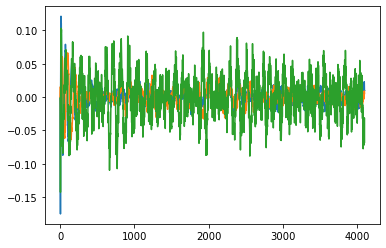

In [46]:
plt.plot(results[0][10])

In [12]:
 

def make_tfrec_train(batches, batch_size): 
    for i in tqdm(range(batches)):
        rg_n = range(i*batch_size,(i+1)*batch_size)
        output_file = f"{savedir}/train_whitened_{i:02}.tfrec"
        if glob(output_file) != []:
            print(f"skipping {i}")
            continue
        else:
            print(f"doing {i}")
    #         rng = (range(i * batch_size, (i+1)*batch_size))
            tr_x, tr_y, ids = save_files(rg_n, train_df)
            writer = tf.io.TFRecordWriter(output_file)
            for i in tqdm(range(tr_x.shape[0])):
                X = tr_x[i]
                y = tr_y[i]
                ident = str.encode(ids[i])

                # Feature contains a map of string to feature proto objects
                feature = {}
                feature["TimeSeries"] = tf.train.Feature(float_list=tf.train.FloatList(value=X.flatten()))
                feature["id"] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[ident]))
                feature["Target"] = tf.train.Feature(int64_list=tf.train.Int64List(value=[y]))

                #contruct the Example proto object
                example = tf.train.Example(features=tf.train.Features(feature=feature))
                serialized = example.SerializeToString()

                # write the serialized object to disk
                writer.write(serialized)
            writer.close()

In [13]:
batches = 16
batch_size = train_df.shape[0] // batches
if __name__ == "__main__":
    for _ in range(batches):
        p = Process(target=make_tfrec_train, args = (batches, batch_size))
        p.start()
        p.join()
else:
    print("name not main")

In [11]:
batches = 1
batch_size = test_df.shape[0] // batches
for i in tqdm(range(batches)):
    rg_n = range(i*batch_size,(i+1)*batch_size)
    output_file = f"{savedir}/test_whitened_{i:02}.tfrec"
    if glob(output_file) != []:
        print(f"skipping {i}")
        continue
    else:
        print(f"doing {i}")
#         rng = (range(i * batch_size, (i+1)*batch_size))
        tr_x, tr_y, ids = save_files(rg_n, test_df)
#         tr_x = test[rg_n]
        writer = tf.io.TFRecordWriter(output_file)
        for i in tqdm(range(tr_x.shape[0])):
            X = tr_x[i]

            # Feature contains a map of string to feature proto objects
            feature = {}
            feature["TimeSeries"] = tf.train.Feature(float_list=tf.train.FloatList(value=X.flatten()))
            feature["id"] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[ident]))

            #contruct the Example proto object
            example = tf.train.Example(features=tf.train.Features(feature=feature))
            serialized = example.SerializeToString()

            # write the serialized object to disk
            writer.write(serialized)
        writer.close()

  0%|          | 0/1 [00:00<?, ?it/s]

doing 0
range(0, 226000)
           id  target                                               path
0  00005bced6     0.5  ../input/g2net-gravitational-wave-detection/te...
1  0000806717     0.5  ../input/g2net-gravitational-wave-detection/te...
2  0000ef4fe1     0.5  ../input/g2net-gravitational-wave-detection/te...
3  00020de251     0.5  ../input/g2net-gravitational-wave-detection/te...
4  00024887b5     0.5  ../input/g2net-gravitational-wave-detection/te...


  0%|          | 0/226000 [00:00<?, ?it/s]

  0%|          | 0/226000 [00:00<?, ?it/s]

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'feature'

In [ ]:
test = tr_x
test.shape